pyNeuroML >>> Reloading data specified in LEMS file: LEMS_NoisyCurrentInput_test.xml (/home/padraig/neuroConstruct/osb/showcase/StochasticityShowcase/NeuroML2/LEMS_NoisyCurrentInput_test.xml), base_dir: ., cwd: /home/padraig/neuroConstruct/osb/showcase/StochasticityShowcase/NeuroML2
Reloaded data: ['Pop0/3/IF_curr_exp/noisyCurrentSource3/i', 'Pop0/2/IF_curr_exp/v', 'Pop0/1/IF_curr_exp/noisyCurrentSource1/i', 'Pop0/1/IF_curr_exp/v', 'Pop0/3/IF_curr_exp/v', 'Pop0/2/IF_curr_exp/noisyCurrentSource2/i', 'Pop0/0/IF_curr_exp/v', 'Pop0/0/IF_curr_exp/pulseGen0/i', u't']
pyNeuroML >>> Generating plot: Currents generated from LEMS_NoisyCurrentInput_test.xml
pyNeuroML >>> Generating plot: Histogram of current amplitudes from LEMS_NoisyCurrentInput_test.xml
pyNeuroML >>> Reloading data specified in LEMS file: LEMS_OUCurrentInput_test.xml (/home/padraig/neuroConstruct/osb/showcase/StochasticityShowcase/NeuroML2/LEMS_OUCurrentInput_test.xml), base_dir: ., cwd: /home/padraig/neuroConstruct/osb/showcas

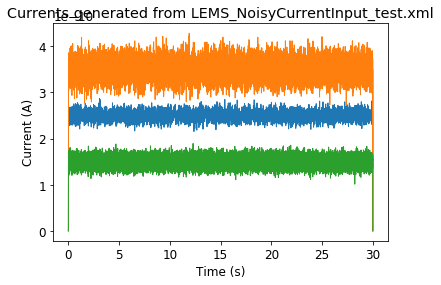

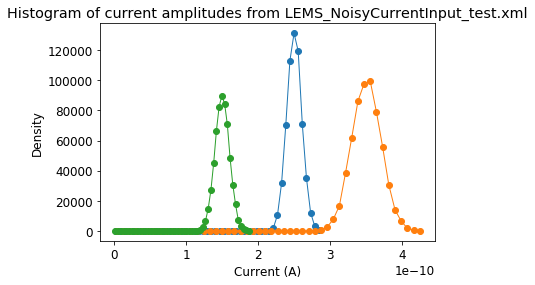

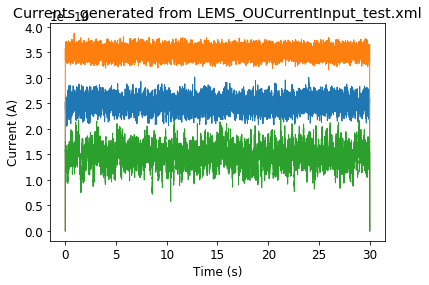

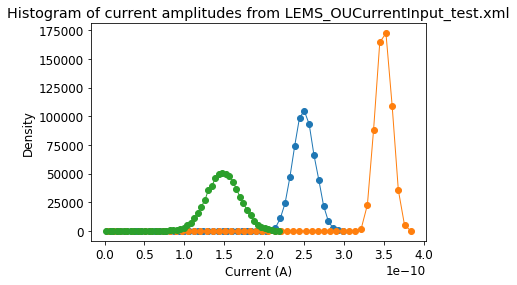

In [1]:
from pyneuroml import pynml
from matplotlib import pyplot as plt
%matplotlib inline
import numpy

lems_files = ['LEMS_NoisyCurrentInput_test.xml','LEMS_OUCurrentInput_test.xml']

for lems_file in lems_files:
    
    results = pynml.run_lems_with_jneuroml(lems_file, nogui=True, load_saved_data=True)

    print("Reloaded data: %s"%results.keys())


    ax = pynml.generate_plot([results['t'],results['t'],results['t']],                        
                             [results['Pop0/1/IF_curr_exp/noisyCurrentSource1/i'],
                              results['Pop0/2/IF_curr_exp/noisyCurrentSource2/i'],
                             results['Pop0/3/IF_curr_exp/noisyCurrentSource3/i']],                  
                             "Currents generated from %s"%lems_file,                 
                             xaxis = 'Time (s)',          
                             yaxis = 'Current (A)',
                             title_above_plot=True,
                             show_plot_already=False)


    bins=50

    hist1, edges1 = numpy.histogram(results['Pop0/1/IF_curr_exp/noisyCurrentSource1/i'],bins=bins)
    mid1 = [e +(edges1[1]-edges1[0])/2 for e in edges1[:-1]]

    hist2, edges2 = numpy.histogram(results['Pop0/2/IF_curr_exp/noisyCurrentSource2/i'],bins=bins)
    mid2 = [e +(edges2[1]-edges2[0])/2 for e in edges2[:-1]]

    hist3, edges3 = numpy.histogram(results['Pop0/3/IF_curr_exp/noisyCurrentSource3/i'],bins=bins)
    mid3 = [e +(edges3[1]-edges3[0])/2 for e in edges3[:-1]]



    ax = pynml.generate_plot([mid1,mid2,mid3],                        
                             [hist1, hist2, hist3],                  
                             "Histogram of current amplitudes from %s"%lems_file,                 
                             xaxis = 'Current (A)',          
                             yaxis = 'Density',
                             title_above_plot=True,
                             markers = ['o','o','o'],
                             show_plot_already=False)
        

plt.show()
                         

                         
